In [ ]:
# Autenticar tu cuenta de Google
from google.colab import auth
auth.authenticate_user()

# Configurar las credenciales
from google.cloud import storage
client = storage.Client()

In [ ]:
# Especifica el nombre del bucket y el archivo
bucket_name = 'etl_archivos'
file_name = 'ReviewsTodasFinal.parquet'

# Descargar el archivo desde el bucket
bucket = client.get_bucket(bucket_name)
blob = bucket.blob(file_name)
blob.download_to_filename(file_name)

# Cargar el CSV en un DataFrame de pandas
import pandas as pd
reviews_df = pd.read_parquet(file_name)

# Print the column names to verify if 'stars' exists
reviews_df.head()


,business_id,date,rating,text,user_id,platform_x,year,semester,review_id
0,40.2101961875-75.2236385919,2018-07-07,3,"If you decide to eat here, just be aware it is...",mh_-eMZ6K5RLWhZyISBhwA,Yelp,2018,2,b01498b3-f9ef-4106-a3c6-e566637d3d2f
1,32.2072326-110.9808639,2014-02-05,3,Family diner. Had the buffet. Eclectic assortm...,8g_iMtfSiwikVnbP2etR0A,Yelp,2014,1,117435eb-3dd2-4654-980b-4d70061af98c
2,40.0798480557-75.025079772,2015-01-04,5,"Wow! Yummy, different, delicious. Our favo...",_7bHUi9Uuf5__HHc_Q8guQ,Yelp,2015,1,bd748f17-e972-4307-8f35-0dc4f3c3719e
3,29.962102-90.087958,2017-01-14,4,Cute interior and owner (?) gave us tour of up...,bcjbaE6dDog4jkNY91ncLQ,Yelp,2017,1,7b0eaa53-b0ee-47c7-8509-3bcf5bd19dd4
4,39.9380132-75.1481307,2015-09-23,1,I am a long term frequent customer of this est...,eUta8W_HdHMXPzLBBZhL1A,Yelp,2015,2,1ee31030-e22f-4514-8af4-4c99699851d0


In [ ]:
reviews_df.isnull().sum()

business_id        0
date               0
rating             0
text           97156
user_id            0
platform_x         0
year               0
semester           0
review_id          0
dtype: int64

In [ ]:
reviews_df.shape

(5510655, 9)

In [ ]:
reviews_df.dropna(inplace=True)
reviews_df.isnull().sum()

business_id    0
date           0
rating         0
text           0
user_id        0
platform_x     0
year           0
semester       0
review_id      0
dtype: int64

In [ ]:
reviews_df.shape

(5413499, 9)

In [ ]:
!pip install textblob
import pandas as pd
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Descargar los recursos necesarios de NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


# Funciones de preprocesamiento
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if text is None:  # Manejar valores nulos
        return ''
    text = text.lower()  # Convertir texto a minúsculas
    text = ''.join([char for char in text if char not in string.punctuation])  # Eliminar puntuaciones
    words = word_tokenize(text)  # Tokenizar texto
    words = [word for word in words if word not in stop_words]  # Eliminar stopwords
    words = [lemmatizer.lemmatize(word) for word in words]  # Lematizar palabras
    return ' '.join(words)

# Aplicar preprocesamiento a las reseñas
reviews_df['cleaned_text'] = reviews_df['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
reviews_df.head()

,business_id,date,rating,text,user_id,platform_x,year,semester,review_id,cleaned_text
0,40.2101961875-75.2236385919,2018-07-07,3,"If you decide to eat here, just be aware it is...",mh_-eMZ6K5RLWhZyISBhwA,Yelp,2018,2,b01498b3-f9ef-4106-a3c6-e566637d3d2f,decide eat aware going take 2 hour beginning e...
1,32.2072326-110.9808639,2014-02-05,3,Family diner. Had the buffet. Eclectic assortm...,8g_iMtfSiwikVnbP2etR0A,Yelp,2014,1,117435eb-3dd2-4654-980b-4d70061af98c,family diner buffet eclectic assortment large ...
2,40.0798480557-75.025079772,2015-01-04,5,"Wow! Yummy, different, delicious. Our favo...",_7bHUi9Uuf5__HHc_Q8guQ,Yelp,2015,1,bd748f17-e972-4307-8f35-0dc4f3c3719e,wow yummy different delicious favorite lamb cu...
3,29.962102-90.087958,2017-01-14,4,Cute interior and owner (?) gave us tour of up...,bcjbaE6dDog4jkNY91ncLQ,Yelp,2017,1,7b0eaa53-b0ee-47c7-8509-3bcf5bd19dd4,cute interior owner gave u tour upcoming patio...
4,39.9380132-75.1481307,2015-09-23,1,I am a long term frequent customer of this est...,eUta8W_HdHMXPzLBBZhL1A,Yelp,2015,2,1ee31030-e22f-4514-8af4-4c99699851d0,long term frequent customer establishment went...


<ipython-input-36-17b28bbac94d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_1['rating'] = pd.to_numeric(_df_1['rating'], errors='coerce')


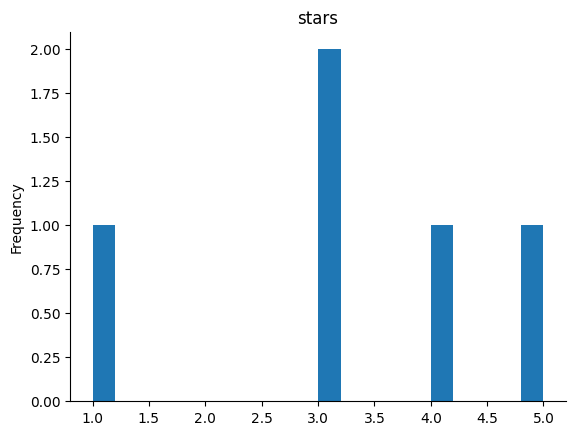

In [ ]:
# Convert the 'rating' column to numeric type
_df_1['rating'] = pd.to_numeric(_df_1['rating'], errors='coerce')

# Plot the histogram
from matplotlib import pyplot as plt
_df_1['rating'].plot(kind='hist', bins=20, title='stars')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
def analyze_sentiment(row):
  """
  Analiza el sentimiento de una reseña considerando el texto y el rating.
  """
  text = row['cleaned_text']

  # Manejar valores no numéricos o faltantes en la columna 'rating'
  try:
    rating = int(row['rating'])
  except ValueError:
    rating = 0  # O cualquier otro valor por defecto que quieras asignar

  analysis = TextBlob(text)
  polarity = analysis.sentiment.polarity

  # Ajusta el sentimiento basado en el rating
  if rating <= 2:
    sentiment = 0  # Reseña negativa
  elif rating == 3:
    sentiment = 1  # Reseña neutra
  else:
    if polarity > 0.2:
      sentiment = 2  # Reseña positiva
    elif polarity > -0.2:
      sentiment = 1  # Reseña neutra
    else:
      sentiment = 0 # Reseña negativa

  return sentiment

# Aplica la función actualizada al DataFrame
reviews_df['sentiment'] = reviews_df.apply(analyze_sentiment, axis=1)

In [ ]:
reviews_df.head()

,business_id,date,rating,text,user_id,platform_x,year,semester,review_id,cleaned_text,sentiment
0,40.2101961875-75.2236385919,2018-07-07,3,"If you decide to eat here, just be aware it is...",mh_-eMZ6K5RLWhZyISBhwA,Yelp,2018,2,b01498b3-f9ef-4106-a3c6-e566637d3d2f,decide eat aware going take 2 hour beginning e...,1
1,32.2072326-110.9808639,2014-02-05,3,Family diner. Had the buffet. Eclectic assortm...,8g_iMtfSiwikVnbP2etR0A,Yelp,2014,1,117435eb-3dd2-4654-980b-4d70061af98c,family diner buffet eclectic assortment large ...,1
2,40.0798480557-75.025079772,2015-01-04,5,"Wow! Yummy, different, delicious. Our favo...",_7bHUi9Uuf5__HHc_Q8guQ,Yelp,2015,1,bd748f17-e972-4307-8f35-0dc4f3c3719e,wow yummy different delicious favorite lamb cu...,2
3,29.962102-90.087958,2017-01-14,4,Cute interior and owner (?) gave us tour of up...,bcjbaE6dDog4jkNY91ncLQ,Yelp,2017,1,7b0eaa53-b0ee-47c7-8509-3bcf5bd19dd4,cute interior owner gave u tour upcoming patio...,2
4,39.9380132-75.1481307,2015-09-23,1,I am a long term frequent customer of this est...,eUta8W_HdHMXPzLBBZhL1A,Yelp,2015,2,1ee31030-e22f-4514-8af4-4c99699851d0,long term frequent customer establishment went...,0


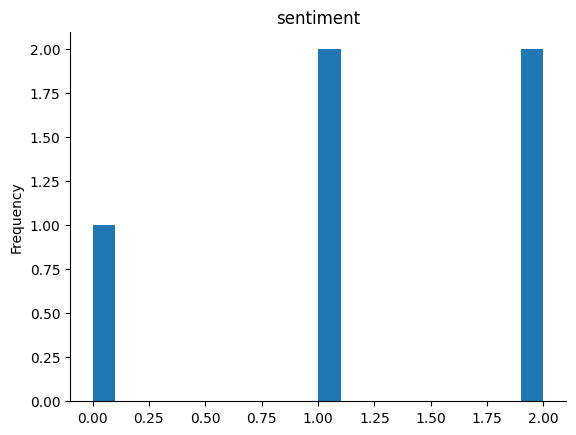

In [ ]:
from matplotlib import pyplot as plt
_df_23['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Guardar el DataFrame como un archivo CSV en Google Cloud Storage
reviews_df.to_parquet('gs://etl_archivos/ReviewsUnificadosSentiment.parquet', index=False)